In [97]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import random
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from datetime import datetime, time
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 7),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [191]:
#Regular Season - Points Per 100 Poss
#a box score estimate of the stats per 100 TEAM possessions
p19 = pd.read_csv('Team Ratings - Playoffs.csv')
p19 = p19[p19['Season']==2019]
p19['Team'] = p19['Team'].astype(str)
p19 = p19.drop(['Rk','G','W','L','W/L%','PW','PL'],axis=1)
p19 = p19.set_index(['Team','Season'])
p19['Reg ORtg'] = rs19['ORtg']
p19['Reg DRtg'] = rs19['DRtg']
p19['Reg NRtg'] = rs19['NRtg']
p19['Reg Pace'] = rs19['Pace']
p19['Reg FTr'] = rs19['FTr']
p19['Reg 3PAr']= rs19['3PAr']
p19['Reg TS%'] = rs19['TS%']
p19.reset_index(inplace=True)

In [192]:
p19

,Team,Season,ORtg,DRtg,NRtg,Pace,FTr,3PAr,TS%,Reg ORtg,Reg DRtg,Reg NRtg,Reg Pace,Reg FTr,Reg 3PAr,Reg TS%
0,Toronto Raptors,2019,110.0,104.4,5.6,96.0,0.275,0.406,0.561,113.1,107.1,6.0,100.2,0.247,0.379,0.579
1,Golden State Warriors,2019,115.3,111.9,3.4,98.1,0.282,0.380,0.589,115.9,109.5,6.4,100.9,0.227,0.384,0.596
2,Milwaukee Bucks,2019,111.1,102.5,8.6,100.1,0.317,0.431,0.560,113.8,105.2,8.6,103.3,0.255,0.419,0.583
3,Portland Trail Blazers,2019,110.6,112.0,-1.4,96.0,0.274,0.363,0.541,114.7,110.5,4.2,99.1,0.258,0.339,0.568
4,Denver Nuggets,2019,114.4,112.5,1.9,92.6,0.279,0.308,0.538,113.0,108.9,4.1,97.7,0.232,0.348,0.558
5,Philadelphia 76ers,2019,109.9,106.8,3.1,98.9,0.301,0.331,0.559,112.6,110.0,2.6,101.6,0.312,0.342,0.574
6,Houston Rockets,2019,110.9,107.6,3.3,97.0,0.290,0.510,0.574,115.5,110.7,4.8,97.9,0.279,0.519,0.581
7,Boston Celtics,2019,102.2,103.6,-1.4,99.9,0.288,0.392,0.539,112.2,107.8,4.4,99.6,0.215,0.381,0.567
8,San Antonio Spurs,2019,112.4,114.5,-2.1,91.9,0.270,0.233,0.542,112.9,111.2,1.7,98.3,0.237,0.286,0.572
9,Los Angeles Clippers,2019,111.5,121.0,-9.5,102.9,0.323,0.355,0.563,112.4,111.5,0.9,101.7,0.326,0.295,0.575


In [242]:
p19diff = p19.copy()
p19diff['ORtg Diff'] = round(p19diff['ORtg']/p19diff['Reg ORtg'],3)
p19diff['DRtg Diff'] = round(p19diff['DRtg']/p19diff['Reg DRtg'],3)
p19diff['NRtg Diff'] = round(p19diff['NRtg']-p19diff['Reg NRtg'],3)
p19diff['Pace Diff'] = round(p19diff['Pace']-p19diff['Reg Pace'],1)
p19diff['FTr Diff'] = round(p19diff['FTr']/p19diff['Reg FTr'],3)
p19diff['3PAr Diff'] = round(p19diff['3PAr']/p19diff['Reg 3PAr'],3)
p19diff['TS% Diff'] = round(p19diff['TS%']/p19diff['Reg TS%'],3)
p19diff.drop(p19diff.iloc[:,1:16],inplace=True,axis=1)
p19diff

,Team,ORtg Diff,DRtg Diff,NRtg Diff,Pace Diff,FTr Diff,3PAr Diff,TS% Diff
0,Toronto Raptors,0.973,0.975,-0.4,-4.2,1.113,1.071,0.969
1,Golden State Warriors,0.995,1.022,-3.0,-2.8,1.242,0.990,0.988
2,Milwaukee Bucks,0.976,0.974,0.0,-3.2,1.243,1.029,0.961
3,Portland Trail Blazers,0.964,1.014,-5.6,-3.1,1.062,1.071,0.952
4,Denver Nuggets,1.012,1.033,-2.2,-5.1,1.203,0.885,0.964
5,Philadelphia 76ers,0.976,0.971,0.5,-2.7,0.965,0.968,0.974
6,Houston Rockets,0.960,0.972,-1.5,-0.9,1.039,0.983,0.988
7,Boston Celtics,0.911,0.961,-5.8,0.3,1.340,1.029,0.951
8,San Antonio Spurs,0.996,1.030,-3.8,-6.4,1.139,0.815,0.948
9,Los Angeles Clippers,0.992,1.085,-10.4,1.2,0.991,1.203,0.979


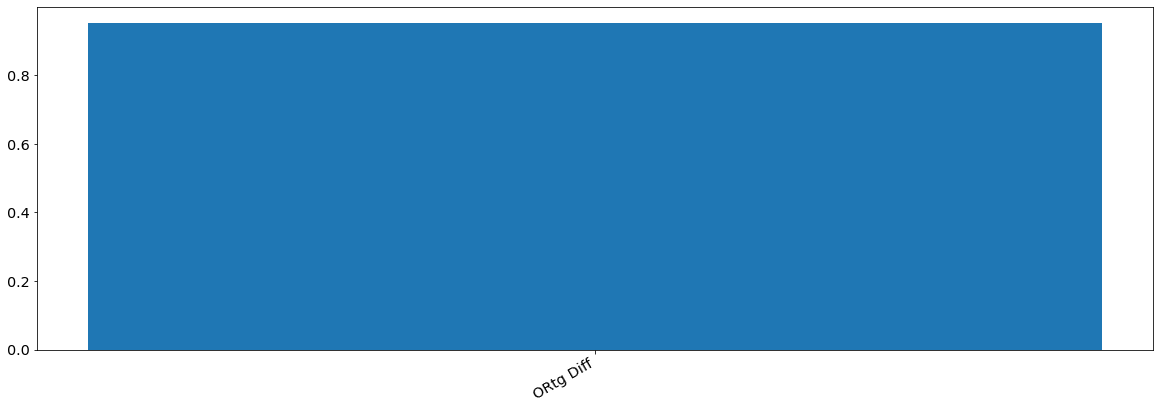

In [214]:
fig,ax = plt.subplots(figsize=(20,7))
ax.bar('ORtg Diff',np.mean(p19diff['ORtg Diff']))
plt.xticks(rotation=45)
fig.autofmt_xdate()
plt.show()

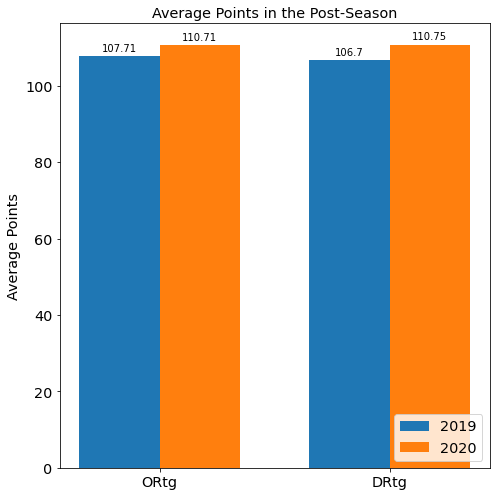

In [44]:
labels = ['ORtg','DRtg']
x=np.arange(len(labels))
width=0.35

ortg = [round(np.mean(rs19['ORtg']),2), round(np.mean(rs20['ORtg']),2)]
drtg = [round(np.mean(rs19['DRtg']),2), round(np.mean(rs20['DRtg']),2)]


fig, ax = plt.subplots(figsize=(7,7))

rects1 = ax.bar(x-width/2,ortg, width, color='tab:blue',label='2019')
rects2 = ax.bar(x+width/2,drtg, width, color='tab:orange',label='2020')

ax.set_ylabel('Average Points')
ax.set_title('Average Points in the Post-Season')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='lower right')

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)



fig.tight_layout()
plt.show()



In [144]:
# Save if need to reinitialize RS tables
rs19 = pd.read_csv('Team Ratings - Reg Season.csv')
rs19 = rs19[rs19['Season']==2019]
rs19 = rs19.drop(['Rk'],axis=1)
rs19['Team'] = rs19['Team'].apply(lambda x: x.split("*")[0])
rs19['Team'] = rs19['Team'].astype(str)
rs19 = rs19.set_index(['Team','Season'])
rs19;

In [291]:
rs20 = pd.read_csv('Team Ratings - Reg Season.csv')
rs20 = rs20[rs20['Season']==2020]
rs20 = rs20.drop(['Rk'],axis=1)
rs20['Team'] = rs20['Team'].apply(lambda x: x.split("*")[0])
rs20['Team'] = rs20['Team'].astype(str)

rs20;

In [292]:
rs20 = rs20.set_index(['Team','Season'])
rs20

,,Age,W,L,ORtg,DRtg,NRtg,Pace,FTr,3PAr,TS%
Team,Season,,,,,,,,,,
Milwaukee Bucks,2020,29.2,56,17,112.4,102.9,9.5,105.1,0.271,0.428,0.583
Los Angeles Clippers,2020,27.4,49,23,113.9,107.6,6.3,101.5,0.295,0.375,0.577
Los Angeles Lakers,2020,29.5,52,19,112.0,106.3,5.7,100.9,0.276,0.358,0.573
Toronto Raptors,2020,26.6,53,19,111.1,105.0,6.1,100.9,0.264,0.421,0.574
Boston Celtics,2020,25.3,48,24,113.3,107.0,6.3,99.5,0.259,0.386,0.570
Dallas Mavericks,2020,26.1,43,32,116.7,111.7,5.0,99.3,0.264,0.457,0.581
Houston Rockets,2020,29.2,44,28,112.9,110.1,2.8,103.7,0.288,0.501,0.578
Miami Heat,2020,25.9,44,29,112.5,109.5,3.0,98.3,0.299,0.419,0.587
Utah Jazz,2020,27.3,44,28,112.3,109.9,2.4,98.6,0.268,0.414,0.585


In [293]:
#2020 Playoff Ratings, with Reg Season Reference
p20 = pd.read_csv('Team Ratings - Playoffs.csv')
p20 = p20[p20['Season']==2020]
p20 = p20.drop(['Rk','PW','PL'],axis=1)
p20 = p20.set_index(['Team','Season'])
p20['Reg ORtg'] = rs20['ORtg']
p20['Reg DRtg'] = rs20['DRtg']
p20['Reg NRtg'] = rs20['NRtg']
p20['Reg Pace'] = rs20['Pace']
p20['Reg FTr'] = rs20['FTr']
p20['Reg 3PAr']= rs20['3PAr']
p20['Reg TS%'] = rs20['TS%']
#p20.reset_index(inplace=True)
p20

,,G,W,L,W/L%,ORtg,DRtg,NRtg,Pace,FTr,3PAr,TS%,Reg ORtg,Reg DRtg,Reg NRtg,Reg Pace,Reg FTr,Reg 3PAr,Reg TS%
Team,Season,,,,,,,,,,,,,,,,,,
Los Angeles Lakers,2020,21,16,5,0.762,115.9,108.9,7.0,97.3,0.293,0.407,0.595,112.0,106.3,5.7,100.9,0.276,0.358,0.573
Miami Heat,2020,21,14,7,0.667,113.5,111.5,2.0,95.9,0.322,0.433,0.587,112.5,109.5,3.0,98.3,0.299,0.419,0.587
Boston Celtics,2020,17,10,7,0.588,111.3,106.3,5.0,96.4,0.285,0.429,0.572,113.3,107.0,6.3,99.5,0.259,0.386,0.570
Denver Nuggets,2020,19,9,10,0.474,113.6,116.0,-2.4,94.1,0.260,0.392,0.584,113.1,111.0,2.1,97.1,0.235,0.344,0.567
Los Angeles Clippers,2020,13,7,6,0.538,115.4,111.1,4.3,98.0,0.291,0.380,0.585,113.9,107.6,6.3,101.5,0.295,0.375,0.577
Toronto Raptors,2020,11,7,4,0.636,108.3,104.2,4.1,99.1,0.240,0.455,0.559,111.1,105.0,6.1,100.9,0.264,0.421,0.574
Houston Rockets,2020,12,5,7,0.417,108.3,107.5,0.8,98.6,0.235,0.545,0.569,112.9,110.1,2.8,103.7,0.288,0.501,0.578
Milwaukee Bucks,2020,10,5,5,0.500,109.7,108.5,1.2,100.3,0.279,0.426,0.568,112.4,102.9,9.5,105.1,0.271,0.428,0.583
Oklahoma City Thunder,2020,7,3,4,0.429,102.4,108.7,-6.3,100.1,0.281,0.428,0.542,110.8,108.8,2.0,98.8,0.290,0.353,0.573


In [294]:
p20diff = p20.copy()
#p20diff = p20diff.set_index(['Team','Season'])
p20diff

,,G,W,L,W/L%,ORtg,DRtg,NRtg,Pace,FTr,3PAr,TS%,Reg ORtg,Reg DRtg,Reg NRtg,Reg Pace,Reg FTr,Reg 3PAr,Reg TS%
Team,Season,,,,,,,,,,,,,,,,,,
Los Angeles Lakers,2020,21,16,5,0.762,115.9,108.9,7.0,97.3,0.293,0.407,0.595,112.0,106.3,5.7,100.9,0.276,0.358,0.573
Miami Heat,2020,21,14,7,0.667,113.5,111.5,2.0,95.9,0.322,0.433,0.587,112.5,109.5,3.0,98.3,0.299,0.419,0.587
Boston Celtics,2020,17,10,7,0.588,111.3,106.3,5.0,96.4,0.285,0.429,0.572,113.3,107.0,6.3,99.5,0.259,0.386,0.570
Denver Nuggets,2020,19,9,10,0.474,113.6,116.0,-2.4,94.1,0.260,0.392,0.584,113.1,111.0,2.1,97.1,0.235,0.344,0.567
Los Angeles Clippers,2020,13,7,6,0.538,115.4,111.1,4.3,98.0,0.291,0.380,0.585,113.9,107.6,6.3,101.5,0.295,0.375,0.577
Toronto Raptors,2020,11,7,4,0.636,108.3,104.2,4.1,99.1,0.240,0.455,0.559,111.1,105.0,6.1,100.9,0.264,0.421,0.574
Houston Rockets,2020,12,5,7,0.417,108.3,107.5,0.8,98.6,0.235,0.545,0.569,112.9,110.1,2.8,103.7,0.288,0.501,0.578
Milwaukee Bucks,2020,10,5,5,0.500,109.7,108.5,1.2,100.3,0.279,0.426,0.568,112.4,102.9,9.5,105.1,0.271,0.428,0.583
Oklahoma City Thunder,2020,7,3,4,0.429,102.4,108.7,-6.3,100.1,0.281,0.428,0.542,110.8,108.8,2.0,98.8,0.290,0.353,0.573


In [295]:

p20diff['ORtg Diff'] = round(p20diff['ORtg']-p20diff['Reg ORtg'],3)
p20diff['DRtg Diff'] = round(p20diff['DRtg']-p20diff['Reg DRtg'],3)
p20diff['NRtg Diff'] = round(p20diff['NRtg']-p20diff['Reg NRtg'],3)
p20diff['Pace Diff'] = round(p20diff['Pace']-p20diff['Reg Pace'],1)
p20diff['FTr Diff'] = round(p20diff['FTr']-p20diff['Reg FTr'],3)
p20diff['3PAr Diff'] = round(p20diff['3PAr']-p20diff['Reg 3PAr'],3)
p20diff['TS% Diff'] = round(p20diff['TS%']-p20diff['Reg TS%'],3)


#p20diff.drop(p20diff.iloc[:,1:16],inplace=True,axis=1)
p20diff

,,G,W,L,W/L%,ORtg,DRtg,NRtg,Pace,FTr,3PAr,TS%,Reg ORtg,Reg DRtg,Reg NRtg,Reg Pace,Reg FTr,Reg 3PAr,Reg TS%,ORtg Diff,DRtg Diff,NRtg Diff,Pace Diff,FTr Diff,3PAr Diff,TS% Diff
Team,Season,,,,,,,,,,,,,,,,,,,,,,,,,
Los Angeles Lakers,2020,21,16,5,0.762,115.9,108.9,7.0,97.3,0.293,0.407,0.595,112.0,106.3,5.7,100.9,0.276,0.358,0.573,3.9,2.6,1.3,-3.6,0.017,0.049,0.022
Miami Heat,2020,21,14,7,0.667,113.5,111.5,2.0,95.9,0.322,0.433,0.587,112.5,109.5,3.0,98.3,0.299,0.419,0.587,1.0,2.0,-1.0,-2.4,0.023,0.014,0.000
Boston Celtics,2020,17,10,7,0.588,111.3,106.3,5.0,96.4,0.285,0.429,0.572,113.3,107.0,6.3,99.5,0.259,0.386,0.570,-2.0,-0.7,-1.3,-3.1,0.026,0.043,0.002
Denver Nuggets,2020,19,9,10,0.474,113.6,116.0,-2.4,94.1,0.260,0.392,0.584,113.1,111.0,2.1,97.1,0.235,0.344,0.567,0.5,5.0,-4.5,-3.0,0.025,0.048,0.017
Los Angeles Clippers,2020,13,7,6,0.538,115.4,111.1,4.3,98.0,0.291,0.380,0.585,113.9,107.6,6.3,101.5,0.295,0.375,0.577,1.5,3.5,-2.0,-3.5,-0.004,0.005,0.008
Toronto Raptors,2020,11,7,4,0.636,108.3,104.2,4.1,99.1,0.240,0.455,0.559,111.1,105.0,6.1,100.9,0.264,0.421,0.574,-2.8,-0.8,-2.0,-1.8,-0.024,0.034,-0.015
Houston Rockets,2020,12,5,7,0.417,108.3,107.5,0.8,98.6,0.235,0.545,0.569,112.9,110.1,2.8,103.7,0.288,0.501,0.578,-4.6,-2.6,-2.0,-5.1,-0.053,0.044,-0.009
Milwaukee Bucks,2020,10,5,5,0.500,109.7,108.5,1.2,100.3,0.279,0.426,0.568,112.4,102.9,9.5,105.1,0.271,0.428,0.583,-2.7,5.6,-8.3,-4.8,0.008,-0.002,-0.015
Oklahoma City Thunder,2020,7,3,4,0.429,102.4,108.7,-6.3,100.1,0.281,0.428,0.542,110.8,108.8,2.0,98.8,0.290,0.353,0.573,-8.4,-0.1,-8.3,1.3,-0.009,0.075,-0.031


In [296]:
p20diff.reset_index(inplace=True)

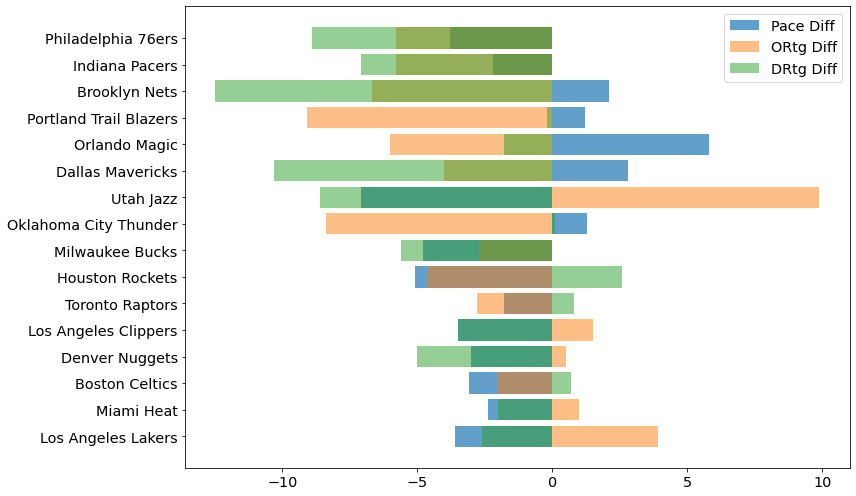

In [297]:
fig, ax = plt.subplots(figsize=(12,7))
ax.barh(p20diff['Team'],p20diff['Pace Diff'],alpha=0.7,label='Pace Diff')
ax.barh(p20diff['Team'],p20diff['ORtg Diff'],alpha=0.5,label='ORtg Diff')
ax.barh(p20diff['Team'],-p20diff['DRtg Diff'],alpha=0.5,label='DRtg Diff')
ax.legend()
fig.tight_layout()

In [299]:
p20diff['Team'].values

array(['Los Angeles Lakers', 'Miami Heat', 'Boston Celtics',
       'Denver Nuggets', 'Los Angeles Clippers', 'Toronto Raptors',
       'Houston Rockets', 'Milwaukee Bucks', 'Oklahoma City Thunder',
       'Utah Jazz', 'Dallas Mavericks', 'Orlando Magic',
       'Portland Trail Blazers', 'Brooklyn Nets', 'Indiana Pacers',
       'Philadelphia 76ers'], dtype=object)